In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
#from tqdm.auto import tqdm
from tqdm import tqdm
plt.ioff();
try:
    maindir
except NameError:
    maindir = os.path.dirname(os.getcwd())
for module in tqdm(os.listdir(maindir + '\\testing_modules')):
    %run -i "{maindir}\\testing_modules\\{module}"
base = os.path.dirname(os.path.dirname(maindir)) + '\\'
plt.ion();
np.set_printoptions(suppress=True)
plt.close('All')
%matplotlib qt

100%|██████████| 23/23 [00:09<00:00,  2.43it/s]


In [2]:
import skimage.io as io
import xarray as xr
from collections import OrderedDict
import dask
from tqdm.dask import TqdmCallback
from sklearn.metrics.pairwise import euclidean_distances
from skimage.transform import resize
from matplotlib.widgets import Slider

In [3]:
scanid = 149248
filedir = '''C:\\Users\\emusterma\\OneDrive - Brookhaven National Laboratory\\Documents\\Postdoc\\Data\\Condensed Datasets\\'''
map_filename = f'scan{scanid}_dexela_xrd.tif'
h5_filename = f'scan{scanid}_xrd.h5'

try:
    test = XRDMap.from_hdf(h5_filename, wd=filedir)
except FileNotFoundError:
    test = XRDMap.from_image_stack(map_filename, wd=filedir, energy=15, scanid=scanid)
    test.set_calibration('scan149256_dexela_calibration.poni')

Loading data from hdf file...
Loading most recent images (raw_images)...

In [3]:
scanid = 149235
scanid = 149257
scanid = 149262
scanid = 149571
filedir = '''D:\\Musterman_postdoc\\20231030_Musterman\\'''
filedir = '''D:\\Musterman_postdoc\\20231109_Musterman\\'''
map_filename = f'scan{scanid}_xrd.tiff'
map_filename = f'scan{scanid}_dexela_xrd.tif'
h5_filename = f'scan{scanid}_xrd.h5'

try:
    test = XRDMap.from_hdf(h5_filename, wd=filedir, dask_enabled=True)
except FileNotFoundError:
    test = XRDMap.from_image_stack(map_filename, wd=filedir, energy=15, scanid=scanid, dask_enabled=True)
    #test.set_calibration('scan149256_dexela2.poni', filedir=filedir)
test.set_calibration('scan149564_dexela_calibration.poni', filedir=filedir)

Loading data from hdf file...
Loading most recent images (raw_images)...done!
Instantiating ImageMap...

done!
XRD Map loaded!


In [3]:
scanid = 149566
filedir = '''C:\\Users\\emusterma\\OneDrive - Brookhaven National Laboratory\\Documents\\Postdoc\\Data\\Condensed Datasets\\'''
map_filename = f'scan{scanid}_dexela_xrd.tif'
h5_filename = f'scan{scanid}_xrd.h5'

try:
    test = XRDMap.from_hdf(h5_filename, wd=filedir, dask_enabled=False)
except FileNotFoundError:
    test = XRDMap.from_image_stack(map_filename, wd=filedir, energy=15, scanid=scanid, dask_enabled=False)
    test.set_calibration('scan149562_dexela_calibration.poni', filedir=filedir)

Loading data from hdf file...
Loading most recent images (final_images)...

done!
Loading reciprocal positions...done!
Loading saved phases...done!
Loading reflection spots...done!
Instantiating ImageMap...done!
XRD Map loaded!


In [10]:
scanid = 153076
filedir = '''C:\\Users\\emusterma\\OneDrive - Brookhaven National Laboratory\\Documents\\Postdoc\\Data\\Condensed Datasets\\'''
map_filename = f'scan{scanid}_dexela_xrd.tif'
h5_filename = f'scan{scanid}_xrd.h5'

try:
    test = XRDMap.from_hdf(h5_filename, wd=filedir, dask_enabled=False)
except FileNotFoundError:
    test = XRDMap.from_image_stack(map_filename, wd=filedir, energy=20, scanid=scanid, dask_enabled=False, save_hdf=False)
    test.set_calibration('scan153220_dexela_calibration_ext.poni', filedir='D:\\Musterman_postdoc\\20240223_Musterman\\calibrations\\')

Loading images...done!


In [10]:
test.plot_interactive_map(img_vmin=200, img_vmax=1000)

In [35]:
dark_field = test.map.images[36, 8]

In [36]:
test.map.correct_dark_field(dark_field=dark_field)

Correcting dark-field...done!


In [28]:
test.plot_interactive_map(img_vmin=0, img_vmax=5000)

In [37]:
test.set_calibration('scan149562_dexela_calibration.poni', filedir=filedir)
test.ai.dist = 0.425797596416
test.ai.poni1 = 0.0760869576
test.ai.poni2 = 0.15890047
test.ai.rot1 = 0.5203013048
test.ai.rot2 = -0.00505270001
test.ai.rot3 = 3.13999999

In [10]:
available_memory = psutil.virtual_memory()[1] / (2**20) # In MB
cpu_count = os.cpu_count()
approx_chunk_size =  (available_memory * 0.85) / cpu_count # 15% wiggle room

In [11]:
approx_chunk_size

1135.3503540039062

In [7]:
import psutil
psutil.virtual_memory()[-1] / (2**20)

21845.06640625

In [8]:
test.map.hdf['xrdmap/image_data/_temp_images'].nbytes > psutil.virtual_memory()[-1]

False

In [14]:
print(f'{psutil.virtual_memory()[-1] / 2**30:.3f} GB remaining.')

17.052 GB remaining


In [7]:
dwell = 1.2
det_sets = '_ln_4x4_'

dark_dir = '''D:\\Musterman_postdoc\\20240125_Musterman\\dark_fields\\fit_images\\'''
dark_paths = np.array(os.listdir(dark_dir))
offset_mask = [det_sets in x and 'offset' in x for x in dark_paths]
offset_df = io.imread(f'{dark_dir}{dark_paths[offset_mask][0]}').astype(np.float32)
scale_mask = [det_sets in x and 'slope' in x for x in dark_paths]
slope_df = io.imread(f'{dark_dir}{dark_paths[scale_mask][0]}').astype(np.float32)

dark_field = slope_df * dwell + offset_df
#scaled_df = dark_field * np.median(test.map.min_image) / np.median(dark_field)
#test.map.correct_dark_field(dark_field=dark_field)

In [12]:
det_sets = '_ln_4x4_'
dark_dir = '''C:\\Users\\emusterma\\OneDrive - Brookhaven National Laboratory\\Documents\\Postdoc\\Data\\Condensed Datasets\\'''
dark_field = io.imread(f'{dark_dir}dexela_df_avg.tif')
scaled_df = dark_field * np.median(test.map.min_image) / np.median(dark_field)
test.map.correct_dark_field(dark_field=scaled_df)

Correcting dark-field...done!


In [ ]:
test.map.images

dask.array<load-store-map, shape=(121, 121, 486, 768), dtype=float32, chunksize=(17, 17, 486, 768), chunktype=numpy.ndarray>

In [7]:
flat_dir = '''D:\\Musterman_postdoc\\20240125_Musterman\\flat_fields\\'''
flat_paths = np.array(os.listdir(flat_dir))
flat_mask = [det_sets in x for x in flat_paths]
flat_field = io.imread(f'{flat_dir}{flat_paths[flat_mask][0]}')
test.map.correct_flat_field(flat_field=flat_field)

Correcting flat-field...done!


In [8]:
test.map._dask_2_hdf()

In [29]:
test.map.correct_outliers()
test.map.normalize_scaler()

Finding and correcting image outliers...done!
No scaler array given. Approximating with image medians...
Normalize image scalers...done!


In [33]:
test.plot_interactive_map(img_vmin=0, img_vmax=5000)

In [10]:
test.map._dask_2_hdf()

In [63]:
test.plot_image()

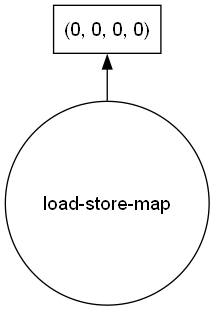

In [13]:
test.map.images.visualize(filename=None)

In [27]:
import scipy.ndimage as ndi
import scipy.io as io
from dask_image import ndfilters as dask_ndi
from dask_image import imread as dask_io

In [39]:
test.map.dtype = np.float32

In [38]:
test.map.apply_lorentz_correction()
test.map.apply_polarization_correction()
test.map.apply_solidangle_correction()

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [12]:
test.map.apply_defect_mask(min_bounds=(-np.inf, 800), max_bounds=(0, np.inf))
test.plot_image(test.map.defect_mask)

In [13]:
test.map._dask_2_hdf()

In [ ]:
#test.map.estimate_background(method='bruckner', binning=2, min_prominence=1)
test.map.estimate_background(method='bruckner', binning=2, min_prominence=0.1)

In [17]:
test.plot_image(test.map.images[0, 0] - test.map.background[0, 0])

In [ ]:
test.map.remove_background()

Removing background...done!


In [ ]:
test.map._dask_2_hdf()

In [ ]:
test.map.apply_defect_mask(min_bounds=(-np.inf, 0), max_bounds=(-0, np.inf))
#test.plot_image(test.map.defect_mask)

In [ ]:
test.map._dask_2_hdf()

In [36]:
cif_dir = '''C:\\Users\\emusterma\\OneDrive - Brookhaven National Laboratory\\Documents\\Postdoc\\Literature\\CIF\\'''
test.clear_phases()
for filename, phase_name in zip(['AMCSD\\Hematite_0017806.cif',
                                 'AMCSD\\Iron-alpha_0011214.cif',
                                 'AMCSD\\Iron-beta_0011215.cif',
                                 'AMCSD\\Iron-delta_0011216.cif',
                                 'AMCSD\\Iron_0011146.cif',
                                 'AMCSD\\Cementite_0013523.cif',
                                 'AMCSD\\Zincite_0011555.cif'],
                                ['Hematite', 'Iron-ferrite', 'Iron-beta',
                                 'Iron-delta', 'Iron-austenite', 'Cementite',
                                 'Zincite']):
    
    test.load_phase(filename, filedir=cif_dir, phase_name=phase_name)

In [13]:
cif_dir = '''C:\\Users\\emusterma\\OneDrive - Brookhaven National Laboratory\\Documents\\Postdoc\\Literature\\CIF\\'''
test.clear_phases()
test.load_phase('Barker\\1521772COD.cif', filedir=cif_dir, phase_name="LiNbO3 161")
test.load_phase('Barker\\LiNbO3.cif', filedir=cif_dir, phase_name="LiNbO3 148")
test.load_phase('AMCSD\\Platinum_0011157.cif', filedir=cif_dir, phase_name="Platinum")
test.load_phase('AMCSD\\Calcite_0000984.cif', filedir=cif_dir, phase_name="Calcite")
test.load_phase('AMCSD\\Aluminum_0011136.cif', filedir=cif_dir, phase_name="Aluminum")
test.load_phase('AMCSD\\Zincite_0011555.cif', filedir=cif_dir, phase_name="Zincite")
#test.load_phase('AMCSD\\Gold_0011140.cif', filedir=cif_dir, phase_name="Gold")
#test.load_phase('AMCSD\\Chromium_0011209.cif', filedir=cif_dir, phase_name="Chromium BCC")
#test.load_phase('AMCSD\\Chromium_0011170.cif', filedir=cif_dir, phase_name="Chromium HCP")
#test.load_phase('AMCSD\\Chromium_0011144.cif', filedir=cif_dir, phase_name="Chromium FCC")
test.load_phase('AMCSD\\Stibnite_0008636.cif', filedir=cif_dir, phase_name="Stibnite")
test.load_phase('AMCSD\\Silicon_0011243.cif', filedir=cif_dir, phase_name="silicon")
test.load_phase('AMCSD\\Corundum_0009327.cif', filedir=cif_dir, phase_name="sapphire")

XU.materials: Warning: element O used instead of O-2
XU.materials: Warning: element Nb used instead of Nb+5
XU.materials: Warning: element Li used instead of Li+1


In [14]:
stibnite = test.phases['Stibnite']
linbo3 = test.phases['LiNbO3 161']
silicon = test.phases['silicon']
sapphire = test.phases['sapphire']

In [637]:
test.ai.dist = 0.390449
test.ai.poni1 = 0.111684
test.ai.poni2 = 0.033238
test.ai.rot1 = -0.90864
test.ai.rot2 = -0.00828204
test.ai.rot3 = 3.14
test._del_arr()

In [15]:
stibnite.get_hkl_reflections(tth_range=(0, np.max(test.tth_arr)), energy=22000)
linbo3.get_hkl_reflections(tth_range=(0, np.max(test.tth_arr)), energy=22000)

In [632]:
silicon.get_hkl_reflections(tth_range=(0, 90), energy=8000)

In [22]:
test.select_phases(remove_less_than=0.1)

In [91]:
stibnite.lattice.symops[1].t

array([0.5, 0. , 0.5])

In [89]:
linbo.lattice.symops[12].D


array([[-0.5,  0.5,  0. ],
       [ 0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0.5]])

In [88]:
v = linbo.lattice.symops[12].D @ [0, 1, 0]
v /= np.linalg.norm(v)
v

array([0.70710678, 0.70710678, 0.        ])

In [77]:
linbo.lattice.symops[12].apply_rotation([2, 0, 0])

array([-2.,  0.,  0.])

In [21]:
print(linbo.lattice.reflection_conditions())

Reflection conditions:
 general: hkil: -h+k+l=3n, hki0: -h+k=3n, hh(-2h)l: l=3n, h-h0l: h+l=3n, l=2n, 000l: l=6n, h-h00: h=3n
     18b: hkil: -h+k+l=3n, hki0: -h+k=3n, hh(-2h)l: l=3n, h-h0l: h+l=3n, l=2n, 000l: l=6n, h-h00: h=3n 
      6a: hkil: l=2n 



In [179]:
test.calibrate_images()
test.map.apply_defect_mask(min_bounds=(-5, 0.05), max_bounds=(0, np.inf))
test.map.rescale_images(arr_min=0)
test.map.finalize_image()

Composite of current images is not saved. Creating composite.
Calibrating images...

100%|██████████| 36/36 [00:08<00:00,  4.25it/s]

done!
Writing reciprocal positions...done!
Acquring and writing calibration mask...

done!


In [ ]:
test.map.rescale_images(arr_min=0)
test.map.finalize_images()

In [44]:
test.plot_interactive_map(img_vmin=0, img_vmax=0.1)

In [27]:
test._open_hdf()

In [28]:
test.plot_image()

In [116]:
i = np.random.randint(test.map.map_shape[0])
j = np.random.randint(test.map.map_shape[1])
#i, j = 2, 5
#i, j = 25, 32
#i, j = 12, 3
#i, j = 15, 44

#out = spot_search(test.map.images[i, j], bkg_noise=map_noise, multiplier=3, plotme=True, mask=test.map.mask, expansion=0, sigma=3)
out = spot_search(test.map.images[i, j], multiplier=4, plotme=True,
                  mask=test.map.mask, expansion=10, size=3, threshold_method='minimum')

In [118]:
#test.map.images = rescale_array(test.map.images, lower=0, upper=100)
test.find_spots(multiplier=4, expansion=10, radius=10, size=3, threshold_method='minimum')

Scheduling spot search...


100%|██████████| 3321/3321 [00:00<00:00, 19556.54it/s]

Searching images for spots...



100%|██████████| 3321/3321 [00:47<00:00, 70.46it/s]


Scheduling spot characterization...


100%|██████████| 92970/92970 [00:05<00:00, 18520.03it/s]


Estimating spot characteristics...


100%|██████████| 92970/92970 [06:29<00:00, 238.62it/s]


In [122]:
test.plot_image(spots=True)

In [35]:
test.fit_spots(GaussianFunctions, max_dist=0.2, sigma=1)

Scheduling blob segmentation for spot fits...


  0%|          | 0/36 [00:00<?, ?it/s]

100%|██████████| 36/36 [00:00<00:00, 61.36it/s]


Segmenting blobs for spot fits...


100%|██████████| 36/36 [00:09<00:00,  3.77it/s]


Scheduling spot fits...


100%|██████████| 4011/4011 [00:00<00:00, 41009.86it/s]


Fitting spots in blobs...


100%|██████████| 4011/4011 [03:19<00:00, 20.12it/s]

Successfully fit 5103 / 5129 spots ( 99.5 % ).
Saving spots to hdf...done!


In [123]:
test.initial_spot_analysis()

Extracting more information from peak parameters...


  0%|          | 0/92970 [00:00<?, ?it/s]

100%|██████████| 92970/92970 [00:45<00:00, 2055.43it/s]

done!
Converting peaks positions to q-space...done!


In [ ]:
test.plot_reconstruction([3, 4], plot_residual=True)

In [38]:
test.plot_image([3, 4], spots=True)

In [124]:
plot_map = np.zeros(test.map.map_shape)
plot_map[:] = np.nan

for image_index in range(test.map.num_images):
    indices = np.unravel_index(image_index, test.map.map_shape)
    pixel_df = test.spots[(test.spots['map_x'] == indices[0])
                          & (test.spots['map_y'] == indices[1])]
    
    if len(pixel_df) < 1:
        plot_map[indices] = 0
    else:
        plot_map[indices] = np.sum(pixel_df['guess_int'])
        #plot_map[indices] = np.sum(pixel_df['fit_amp'])
        #plot_map[indices] = np.sum(pixel_df['fit_integrated'])
        #plot_map[indices] = np.sum(pixel_df['fit_fwhm_chi'])
        #plot_map[indices] = np.mean(pixel_df['fit_chi0'])
        #plot_map[indices] = len(pixel_df)
        #plot_map[indices] = np.nanmedian(pixel_df['qz'])
        #plot_map[indices] = np.nanmin(pixel_df['fit_r_squared'])
        #plot_map[indices] = pixel_df.iloc[np.argmax(pixel_df['fit_integrated'])]['fit_tth0']
        #plot_map[indices] = pixel_df.iloc[np.argmax(pixel_df['fit_integrated'])]['fit_chi0']


fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

im = ax.imshow(plot_map)
fig.colorbar(im, ax=ax)
ax.set_title('Spot Value')

plt.show()

In [1010]:
test.plot_interactive_map(display_map=plot_map, img_vmin=0, img_vmax=0.1, map_vmin=10, map_vmax=5000)

In [179]:
test.map.num_images

3321

In [184]:
np.arange(12, 22.5, 0.5)

array([12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ])

In [189]:
energies = np.arange(12, 22.5, 0.5)

q_list = []

for en in energies:
    wavelength = energy_2_wavelength(en)
    q_arr = get_q_vect(test.tth_arr, test.chi_arr, wavelength=wavelength)
    q_list.append(q_arr)

q_list = np.asarray(q_list)

In [190]:
q_list.shape

(21, 3, 486, 768)

In [267]:
skip = 500
qx, qy, qz = [], [], []
for i, q in enumerate(q_list):
    if i == 0 or i == len(q_list) - 1:
        qx.extend(q[0].ravel()[::skip])
        qy.extend(q[1].ravel()[::skip])
        qz.extend(q[2].ravel()[::skip])
    qx.extend(q[0, 0][::int(np.sqrt(skip))])
    qy.extend(q[1, 0][::int(np.sqrt(skip))])
    qz.extend(q[2, 0][::int(np.sqrt(skip))])

    qx.extend(q[0, -1][::int(np.sqrt(skip))])
    qy.extend(q[1, -1][::int(np.sqrt(skip))])
    qz.extend(q[2, -1][::int(np.sqrt(skip))])

    qx.extend(q[0, :, 0][::int(np.sqrt(skip))])
    qy.extend(q[1, :, 0][::int(np.sqrt(skip))])
    qz.extend(q[2, :, 0][::int(np.sqrt(skip))])

    qx.extend(q[0, :, -1][::int(np.sqrt(skip))])
    qy.extend(q[1, :, -1][::int(np.sqrt(skip))])
    qz.extend(q[2, :, -1][::int(np.sqrt(skip))])

In [920]:
from scipy.ndimage import sobel, laplace, prewitt, generic_laplace, correlate1d

In [935]:
def derivative2(input, axis, output, mode, cval):
    #return correlate1d(input, [1, -2, 1], axis, output, mode, cval, 0)
    return correlate1d(input, [1, 1, -8, 1, 1], axis, output, mode, cval, 0)

In [936]:
lap_image = generic_laplace(sob_image, derivative2)

In [938]:
test.plot_image(-lap_image)

In [948]:
test_image = test.map.images[8, 34].copy()
mask = test.map.spot_masks[8, 34]

In [973]:
sob_image = test_image.copy()
sob_image = gaussian_filter(sob_image, sigma=1)
#sob_x = sobel(sob_image, axis=1)
#sob_y = sobel(sob_image, axis=0)
sob_x = prewitt(sob_image, axis=1)
sob_y = prewitt(sob_image, axis=0)
sob_mag = np.sqrt(sob_x**2 + sob_y**2)
div = sobel(sob_x, axis=1) + sobel(sob_y, axis=0)
mask = div > 2

In [997]:
test.plot_image(gaussian_filter(test_image, sigma=0) - gaussian_filter(test_image, sigma=1))

In [974]:
extent = 10
max_h, max_v = np.unravel_index(np.argmax(-div), div.shape)
h_bounds = (max_v - extent, max_v + extent)
v_bounds = (max_h - extent, max_h + extent)
bound_image = sob_image[v_bounds[0] : v_bounds[1], h_bounds[0] : h_bounds[1]]

In [1002]:
test.plot_image(sob_x)

In [1006]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

ax.imshow(bound_image)

scale = 1

sob_x = sobel(bound_image, axis=1) * scale
sob_y = sobel(bound_image, axis=0) * scale

for index in range(np.prod([*bound_image.shape])):
    indices = np.unravel_index(index, bound_image.shape)

    dx = sob_y[indices]
    dy = sob_x[indices]
    

    #if indices[0] > bound_image.shape[0] // 2 - 1:
    #    dx = -dx
    #if indices[1] > bound_image.shape[1] // 2 - 1:
    #    dy = -dy

    ax.arrow(*indices, dx, dy, width=0.00001, head_width=0.1, fc='r', ec='r')


plt.show()

In [961]:
def intersect(P0, P1):
    """P0 and P1 are NxD arrays defining N lines.
    D is the dimension of the space. This function 
    returns the least squares intersection of the N
    lines from the system given by eq. 13 in 
    http://cal.cs.illinois.edu/~johannes/research/LS_line_intersect.pdf.
    """
    # generate all line direction vectors 
    n = (P1 - P0) / np.linalg.norm(P1 - P0, axis=1)[:, np.newaxis] # normalized

    # generate the array of all projectors 
    projs = np.eye(n.shape[1]) - n[:, :, np.newaxis] * n[:, np.newaxis]  # I - n*n.T
    # see fig. 1 

    # generate R matrix and q vector
    R = projs.sum(axis=0)
    q = (projs @ P0[:, :, np.newaxis]).sum(axis=0)

    # solve the least squares problem for the 
    # intersection point p: Rp = q
    p = np.linalg.lstsq(R, q, rcond=None)[0]

    return p

400

In [950]:
test.plot_image(-div)

In [939]:
lap_image = laplace(sob_image)

In [941]:
test.plot_image(laplace(lap_image))

In [913]:
spots = peak_local_max(-div,
                       min_distance=3,
                       labels=-div > 5,
                       num_peaks_per_label=np.inf)

spots = peak_local_max(-lap_image,
                       min_distance=3,
                       labels=-lap_image > 0.009,
                       num_peaks_per_label=np.inf)

In [914]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

im = ax.imshow(test_image)
fig.colorbar(im, ax=ax)

ax.scatter(spots[:, 1], spots[:, 0], s=1, c='r')

plt.show()

In [625]:
true_center = (48, 0)

x = np.linspace(-50, 50, 500)
xx, yy = np.meshgrid(x, x)

z = GaussianFunctions.func_2d([xx, yy], 100, *true_center, 10, 10, 0)
noise = np.random.normal(loc=0, scale=0, size=z.shape)

noisy_z = z + noise

In [626]:
max_center = xx[np.unravel_index(np.argmax(noisy_z), noisy_z.shape)], yy[np.unravel_index(np.argmax(noisy_z), noisy_z.shape)]
mass_center = arbitrary_center_or_mass(noisy_z, xx, yy)

p0 = [np.max(noisy_z), *mass_center, 1, 1, 0]

popt, _ = curve_fit(GaussianFunctions.func_2d, [xx.ravel(), yy.ravel()], noisy_z.ravel(), p0=p0)
gauss_center = (popt[1], popt[2])

sob_x = sobel(gaussian_filter(noisy_z, sigma=3), axis=1)
sob_y = sobel(gaussian_filter(noisy_z, sigma=3), axis=0)
div = sobel(sob_x, axis=1) + sobel(sob_y, axis=0)
div_mask = -div > 10
sob_center = arbitrary_center_or_mass(-div[div_mask], xx[div_mask], yy[div_mask])


c:\Users\emusterma\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [621]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

im = ax.imshow(noisy_z, extent=[np.min(xx), np.max(xx), np.min(yy), np.max(yy)])
fig.colorbar(im, ax=ax)

for center in [max_center, mass_center, gauss_center, sob_center, true_center]:
    ax.scatter(*center, s=1, c='r')

plt.show()

In [627]:
print(max_center)
print(mass_center)
print(gauss_center)
print(sob_center)
print(true_center)

(47.99599198396794, -0.10020040080160442)
(45.825804918734526, 1.743815701176553e-16)
(47.999999999999915, 1.743815701176553e-16)
(47.024604588734526, 7.110471171656023e-16)
(48, 0)


In [447]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

im = ax.imshow(test_image, vmin=0, vmax=100)
fig.colorbar(im, ax=ax)

ax.scatter(spots[:, 1], spots[:, 0], s=1, c='r')

fig.show()

In [287]:
mask = test.map.spot_masks[74, 32]

In [288]:
v = np.array([sob_x.ravel()[mask.ravel()], sob_y.ravel()[mask.ravel()]])
p = np.array([test.tth_arr.ravel()[mask.ravel()], test.chi_arr.ravel()[mask.ravel()]])

In [324]:
blob_mask = label(mask) == 3
masked_mask = blob_mask[mask]
v3 = v[:, masked_mask]
p3 = p[:, masked_mask]

In [333]:
from itertools import combinations

p_combo = list(combinations(p3.T, 2))
v_combo = list(combinations(v3.T, 2))

In [338]:
v3[:, 0]

array([-0.09966363,  0.17441136], dtype=float32)

In [351]:
list(np.asarray(v_combo[0]).T)

[array([-0.09966363, -0.20555624], dtype=float32),
 array([0.17441136, 0.05606079], dtype=float32)]

In [343]:
p3[:, 0]

array([ 12.67983769, 161.22048606])

In [346]:
(p_combo[0][0] - p_combo[0][1])

array([-0.03483012, -0.04833402])

In [341]:
np.asarray(p_combo[0])

array([[ 12.67983769, 161.22048606],
       [ 12.71466782, 161.26882008]])

In [357]:
A = []
b = []
for pi, vi in zip(p_combo, v_combo):
    A.extend(list(np.asarray(vi).T))
    b.extend(list(pi[0] - pi[1]))

A = np.asarray(A)
b = np.asarray(b)

In [358]:
A.shape

(315282, 2)

In [359]:
b.shape

(315282,)

In [360]:
out = lstsq(A, b)

In [361]:
out

(array([-0.03950399,  0.03491266]),
 507805.83675365685,
 2,
 array([667.06970721, 612.53409207]))

In [371]:
print(v3[:, 0])
print(out[0])

[-0.09966363  0.17441136]
[-0.03950399  0.03491266]


In [386]:
coords = np.mean(v3.T * out[0] + p3.T, axis=0)

In [409]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

ax.scatter(*p3, s=1, c='k')

plt.show()

In [408]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)
ax.scatter(*p3, s=1, c='k')

ax.plot(p3.T, (p3 + (v3 * 0.001)).T)

plt.show()

In [397]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

ax.scatter(*(v3.T * out[0] + p3.T).T, s=1, c='k')

plt.show()

In [393]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

im = ax.imshow(test_image, vmin=0, vmax=0.1)
fig.colorbar(im, ax=ax)

ax.contour(masked)

plt.show()

In [314]:
test.plot_image(label(mask))

In [312]:
print(v[:, 0])
print(v[:, 1])
print(p[:, 0])
print(p[:, 1])

[ 0.11835057 -0.01868693]
[0.23047216 0.03114488]
[ 25.59895322 158.62658482]
[ 25.43680711 158.59622021]


In [305]:
from scipy.linalg import lstsq

out = lstsq(v, p)

ValueError: Input array a should be 2D

In [300]:
q = p + v @ out[0]

In [304]:
q[1]

array([ 317.25316964,  317.19244043,  317.25043743, ..., -331.58475086,
       -331.31714126, -331.34545068])

In [280]:
test.plot_image(sob_mag)

In [269]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200, subplot_kw={'projection':'3d'})

ax.scatter(qx, qy, qz, c='b', s=1, alpha=0.1)
#ax.plot(qx, qy, qz, c='k')
#ax.plot_trisurf(qx, qy, qz, alpha=0.5, label='detector')
#ax.voxels(np.asarray([qx, qy, qz]), alpha=0.5)
    
fig.show()

In [45]:
pixel_df = test.spots[(test.spots['map_x'] == 3)
                        & (test.spots['map_y'] == 3)]

In [47]:
pixel_df.iloc[0]

map_x               3.000000
map_y               3.000000
guess_height        5.275062
guess_img_x        30.000000
guess_img_y       678.000000
guess_tth          38.512360
guess_chi         -13.624387
guess_cen_tth      38.505309
guess_cen_chi     -13.599907
guess_fwhm_tth      0.426384
guess_fwhm_chi      0.687899
guess_int         101.430588
fit_amp             4.920459
fit_tth0           38.504399
fit_chi0          -13.640256
fit_fwhm_tth        0.126779
fit_fwhm_chi        0.169940
fit_theta           6.327112
fit_offset          0.138128
fit_r_squared       0.859608
fit_integrated      0.120120
fit_fwhm_a          0.144735
fit_fwhm_b          0.154934
qx                 -4.599082
qy                 -1.116056
qz                 -1.652888
Name: 51, dtype: float64

In [229]:
test.plot_image(spots=True)

In [230]:
test.plot_reconstruction([26, 21])

In [313]:
test.plot_q_space(pixel_indices=[26, 21])

In [297]:
#fig = plt.figure()
new_fig = test.phases['LiNbO3 148'].show_unitcell()
new_fig.axes[-1].set_aspect('equal')
plt.show()

In [660]:
for ind, hkil in enumerate(hkl_2_hkil(all_hkls)):
    h, k, i, l = hkil
    if h == 1 and k == 1:
        print(ind)

13
20
22
44
46
130
139
276
281
518
520
850
852


In [18]:
skip = 500

all_hkls, all_qs, all_fs = generate_reciprocal_lattice(test.phases['sapphire'], tth_range=(0, 60))
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200, subplot_kw={'projection':'3d'})

plot_qs = euler_rotation(all_qs, -60, 0, 0)

ax.scatter(*np.asarray(plot_qs).T, c='k', s=all_fs/20)
#ax.scatter(*np.asarray(all_qs).T, c='k', s=all_fs/20)
ax.scatter(0, 0, 0, c='k', s=10)

ax.scatter(*np.asarray(plot_qs)[13], c='r', s=10)

for en in [10.125, 10.2, 14.55, 18.375, 19.225, 20.25, 20.375]:

    q = get_q_vect(test.tth_arr, test.chi_arr, wavelength=energy_2_wavelength(en))

    # Plot sampled Ewald sphere
    q_mask = q[:, test.map.mask]
    ax.plot_trisurf(q_mask[0].ravel()[::skip],
                    q_mask[1].ravel()[::skip],
                    q_mask[2].ravel()[::skip],
                    alpha=0.5, label='detector')

ax.set_xlabel('qx [Å⁻¹]')
ax.set_ylabel('qy [Å⁻¹]')
ax.set_zlabel('qz [Å⁻¹]')
ax.set_aspect('equal')

plt.show()

In [845]:
are_coplanar([[-2, 3, -5], [-2, 3, -2], [-3, 4, -4], [-4, 5, -6]])

True

In [783]:
q1 = get_q_vect(test.tth_arr, test.chi_arr, wavelength=energy_2_wavelength(10.125))
q2 = get_q_vect(test.tth_arr, test.chi_arr, wavelength=energy_2_wavelength(22))

In [842]:
q1 = get_q_vect(test.tth_arr, test.chi_arr, wavelength=energy_2_wavelength(10.45))
#plot_qs = euler_rotation(all_qs, -60, 0, 0)
dist = euclidean_distances(plot_qs, q1.reshape(3, -1).T)
dist[dist == 0] = np.nan
indices = np.unravel_index(np.argmin(dist[dist > 0]), dist.shape)
min_dist = dist[indices]
min_hkl = all_hkls[indices[0]]
print(f'Closest reflection is the {min_hkl} at {min_dist:.4f} Å⁻¹ from the detector.')

Closest reflection is the (-2, 3, -5) at 0.3401 Å⁻¹ from the detector.


In [758]:
max_depth = 0

for q1_i, q2_i in tqdm(zip(q1.reshape(3, -1).T, q2.reshape(3, -1).T)):
    dist = euclidean_distances(q1_i.reshape(-1, 1).T, q2_i.reshape(-1, 1).T)[0, 0]
    max_depth = np.max([dist, max_depth])

373248it [01:14, 5004.75it/s]


In [747]:
q_range = list(q1.reshape(3, -1).T) + list(q2.reshape(3, -1).T)

In [19]:
all_hkls, all_qs, all_fs = generate_reciprocal_lattice(test.phases['sapphire'], tth_range=(0, 60))
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200, subplot_kw={'projection':'3d'})

plot_qs = euler_rotation(all_qs, -60, 0, 0)
ax.scatter(*np.asarray(plot_qs).T, c='k', s=all_fs/20)
#ax.scatter(*np.asarray(all_qs).T, c='k', s=all_fs/20)
ax.scatter(0, 0, 0, c='k', s=10)

ax.scatter(*np.asarray(plot_qs)[13], c='r', s=10)

for theta in [0, 5, 5.5, 12.25, 13.625, 14.20, 15.55]:
    theta = np.radians(theta)

    q = get_q_vect(test.tth_arr, test.chi_arr, wavelength=energy_2_wavelength(18))

    Ry = np.array([[np.cos(theta), 0, -np.sin(theta)],
                   [0, 1, 0],
                   [np.sin(theta), 0, np.cos(theta)]])

    # Plot sampled Ewald sphere
    q_mask = q[:, test.map.mask]

    q_mask = (q_mask.T @ Ry).T
    ax.plot_trisurf(q_mask[0].ravel()[::skip],
                    q_mask[1].ravel()[::skip],
                    q_mask[2].ravel()[::skip],
                    alpha=0.5, label='detector')

ax.set_xlabel('qx [Å⁻¹]')
ax.set_ylabel('qy [Å⁻¹]')
ax.set_zlabel('qz [Å⁻¹]')
ax.set_aspect('equal')

plt.show()

In [700]:
are_coplanar([[1, 0, 0], [2, 0, 0], [1, 1, 0]])

True

In [270]:
pixel_indices = [0, 0]
skip = 500

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200, subplot_kw={'projection':'3d'})

plot_qs = euler_rotation(all_qs, 10, -20, 0)

ax.scatter(*np.asarray(plot_qs).T, c='k', s=all_fs / 50, alpha=0.75)
ax.scatter(0, 0, 0, c='k', s=10)

# Plot full Ewald sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
radius = 2 * np.pi / test.wavelength
x =  radius * np.outer(np.cos(u), np.sin(v))
y = radius * np.outer(np.sin(u), np.sin(v))
z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
#ax.plot_surface(x, y, z - radius, alpha=0.2, color='k', label='Ewald sphere')

q = get_q_vect(test.tth_arr, test.chi_arr, wavelength=test.wavelength)

if pixel_indices is not None:
    pixel_df = test.spots[(test.spots['map_x'] == pixel_indices[0])
                            & (test.spots['map_y'] == pixel_indices[1])].copy()


if pixel_indices is not None:
    ax.scatter(*pixel_df[['qx', 'qy', 'qz']].values.T, s=1, c='r', label='spots')

# Sample geometry
ax.quiver([0, 0], [0, 0], [-2 * radius, -radius], [0, 0], [0, 0], [radius, radius], colors='k')
ax.scatter(0, 0, 0, marker='o', s=10, facecolors='none', edgecolors='k', label='transmission')
ax.scatter(0, 0, -radius, marker='h', s=10, c='b', label='sample')

# Plot sampled Ewald sphere
q_mask = q[:, test.map.mask]
ax.plot_trisurf(q_mask[0].ravel()[::skip],
                q_mask[1].ravel()[::skip],
                q_mask[2].ravel()[::skip],
                alpha=0.5, label='detector')

ax.scatter(qx, qy, qz, c='b', s=1, alpha=0.1)

ax.set_xlabel('qx [Å⁻¹]')
ax.set_ylabel('qy [Å⁻¹]')
ax.set_zlabel('qz [Å⁻¹]')
ax.set_aspect('equal')

plt.show()

In [23]:
pixel_indices = [0, 0] #[26, 21]
skip = 500

#fig, ax = plt.subplots(1, 1, figsize=(5, 10), dpi=200, subplot_kw={'projection':'3d'})
fig = plt.figure(figsize=(10, 5), dpi=200)
ax = fig.add_axes([0, 0, 0.5, 1], projection='3d')
#ax = fig.add_subplot(projection='3d')

plot_qs = euler_rotation(all_qs, 10, -20, 0)
recip_latt = ax.scatter(*np.asarray(plot_qs).T, c='k', s=all_fs / 50, alpha=0.75)
ax.scatter(0, 0, 0, c='k', s=10)

# Plot full Ewald sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
radius = 2 * np.pi / test.wavelength
x =  radius * np.outer(np.cos(u), np.sin(v))
y = radius * np.outer(np.sin(u), np.sin(v))
z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
#ax.plot_surface(x, y, z - radius, alpha=0.2, color='k', label='Ewald sphere')

q = get_q_vect(test.tth_arr, test.chi_arr, wavelength=test.wavelength)

if pixel_indices is not None:
    pixel_df = test.spots[(test.spots['map_x'] == pixel_indices[0])
                            & (test.spots['map_y'] == pixel_indices[1])].copy()


if pixel_indices is not None:
    ax.scatter(*pixel_df[['qx', 'qy', 'qz']].values.T, s=1, c='r', label='spots')

# Sample geometry
ax.quiver([0, 0], [0, 0], [-2 * radius, -radius], [0, 0], [0, 0], [radius, radius], colors='k')
ax.scatter(0, 0, 0, marker='o', s=10, facecolors='none', edgecolors='k', label='transmission')
ax.scatter(0, 0, -radius, marker='h', s=10, c='b', label='sample')

# Plot sampled Ewald sphere
q_mask = q[:, test.map.mask]
ax.plot_trisurf(q_mask[0].ravel()[::skip],
                q_mask[1].ravel()[::skip],
                q_mask[2].ravel()[::skip],
                alpha=0.5, label='detector')

phi1, PHI, phi2 = 10, -20, 0
euler_angles = {'phi1' : phi1,
                'PHI' : PHI,
                'phi2': phi2}
euler_bounds = [[-180, 180], [0, 180], [-180, 180]]
slider_lst = []
update_lst = []

slider_vpos = np.linspace(0.8, 0.1, 3)

for i, key in enumerate(euler_angles.keys()):
    slider_ax = fig.add_axes

    # Make a horizontal slider to control the frequency.
    axfreq = fig.add_axes([0.7, slider_vpos[i], 0.2, 0.03])
    euler_slider = Slider(
        ax=axfreq,
        label=f'{key} [deg]',
        valmin=euler_bounds[i][0],
        valmax=euler_bounds[i][1],
        valinit=euler_angles[key],
    )

    slider_lst.append(euler_slider)

    # The function to be called anytime a slider's value changes
    def update_factory(key):
        def update(val):
            global recip_latt
            euler_angles[key] = val
            plot_qs = euler_rotation(all_qs, *euler_angles.values())
            recip_latt.remove()
            recip_latt = ax.scatter(*np.asarray(plot_qs).T, c='k', s=all_fs / 50, alpha=0.75)
            fig.canvas.draw_idle()
        return update

    update_lst.append(update_factory(key))
    slider_lst[i].on_changed(update_lst[i])

ax.set_xlabel('qx [Å⁻¹]')
ax.set_ylabel('qy [Å⁻¹]')
ax.set_zlabel('qz [Å⁻¹]')
ax.set_aspect('equal')

plt.show()

In [158]:
test.spots = pd.read_hdf(test.hdf_path, key='xrdmap/reflections/spots')

In [159]:
dropped_indices = []

for index in test.spots.index:
    spot = test.spots.loc[index]
    if spot['fit_amp'] - spot['fit_offset'] < 0.5:
        dropped_indices.append(index)

In [160]:
test.spots = test.spots.drop(index = dropped_indices)

In [181]:
test.plot_image([15, 23], spots=True)

In [25]:
pixel_indices = 5, 28
pixel_df = test.spots[(test.spots['map_x'] == pixel_indices[0])
                        & (test.spots['map_y'] == pixel_indices[1])].copy()

fit_ori, fit_min = iterative_dictionary_indexing(pixel_df, test.phases['Stibnite'], [np.min(test.tth_arr), np.max(test.tth_arr)],
                                                 cut_off=0.05,
                                                 start_angle=20,
                                                 angle_resolution=0.001, 
                                                 euler_bounds=[[0, 180], [0, 90], [0, 180]])

all_hkls, all_qs, all_fs = generate_reciprocal_lattice(test.phases['Stibnite'], tth_range=(np.min(test.tth_arr), np.max(test.tth_arr)))

NameError: name 'test' is not defined

In [165]:
test.spots.drop(index=311, inplace=True)

In [171]:
test.plot_image(pixel_indices, spots=True)

In [172]:
skip = 500

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200, subplot_kw={'projection':'3d'})

plot_qs = euler_rotation(all_qs, *fit_ori[-2])

ax.scatter(*np.asarray(plot_qs).T, c='k', s=all_fs / 50, alpha=0.75)
ax.scatter(0, 0, 0, c='k', s=10)

# Plot full Ewald sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
radius = 2 * np.pi / test.wavelength
x =  radius * np.outer(np.cos(u), np.sin(v))
y = radius * np.outer(np.sin(u), np.sin(v))
z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
#ax.plot_surface(x, y, z - radius, alpha=0.2, color='k', label='Ewald sphere')

q = get_q_vect(test.tth_arr, test.chi_arr, wavelength=test.wavelength)

if pixel_indices is not None:
    pixel_df = test.spots[(test.spots['map_x'] == pixel_indices[0])
                            & (test.spots['map_y'] == pixel_indices[1])].copy()


if pixel_indices is not None:
    ax.scatter(*pixel_df[['qx', 'qy', 'qz']].values.T, s=1, c='r', label='spots')

# Sample geometry
ax.quiver([0, 0], [0, 0], [-2 * radius, -radius], [0, 0], [0, 0], [radius, radius], colors='k')
ax.scatter(0, 0, 0, marker='o', s=10, facecolors='none', edgecolors='k', label='transmission')
ax.scatter(0, 0, -radius, marker='h', s=10, c='b', label='sample')

# Plot sampled Ewald sphere
q_mask = q[:, test.map.mask]
ax.plot_trisurf(q_mask[0].ravel()[::skip],
                q_mask[1].ravel()[::skip],
                q_mask[2].ravel()[::skip],
                alpha=0.5, label='detector')

ax.set_xlabel('qx [Å⁻¹]')
ax.set_ylabel('qy [Å⁻¹]')
ax.set_zlabel('qz [Å⁻¹]')
ax.set_aspect('equal')

plt.show()

In [140]:
fit_ori

[(40, 160, 280),
 (200, 50.0, 280),
 (200.0, 50.0, 280.0),
 (350.0, 160.0, 237.5),
 (-2.5, 161.25, 243.75),
 (315.625, 51.875, 284.375),
 (315.625, 51.875, 284.375),
 (-5.78125, 160.78125, 241.09375),
 (75.9375, 51.796875, 284.0625),
 (234.6484375, 160.8203125, 241.4453125),
 (234.51171875, 160.80078125, 241.328125),
 (234.521484375, 160.80078125, 241.337890625),
 (-5.4541015625, 160.8056640625, 241.357421875),
 (-5.4541015625, 160.8056640625, 241.357421875),
 (315.95458984375, 51.805419921875, 284.072265625),
 (315.95458984375, 51.805419921875, 284.072265625)]

In [167]:
spot_qs = pixel_df[['qx', 'qy', 'qz']].values
dist = euclidean_distances(spot_qs, euler_rotation(all_qs, *fit_ori[-12]))

In [168]:
fit_hkls = []

for spot in range(len(dist)):
    fit_hkls.append(all_hkls[np.argmin(dist[spot])])
fit_hkls = np.asarray(fit_hkls)

In [169]:
np.unique(fit_hkls, axis=0)

array([[-10,   0,  -4],
       [ -9,  -1,  -3],
       [ -9,   0,  -3],
       [ -9,   1,  -3],
       [ -8,   1,  -2],
       [ -7,  -1,  -2],
       [ -7,   0,  -2],
       [ -7,   1,  -2],
       [ -6,   0,  -1],
       [ -5,   1,  -1],
       [ -4,  -1,  -1],
       [ -4,   1,  -1]])

In [170]:
are_coplanar(np.unique(fit_hkls, axis=0))

False

In [173]:
from scipy import linalg

x, res, rnk, s = linalg.lstsq(fit_hkls, spot_qs)

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200, subplot_kw={'projection':'3d'})


ax.quiver([0, 0, 0], [0, 0, 0], [0, 0, 0], *x.T)

plt.show()

In [175]:
b1, b2, b3 = x
b1_mag = linalg.norm(b1)
b2_mag = linalg.norm(b2)
b3_mag = linalg.norm(b3)
beta1 = np.arccos(np.dot(b3, b2) / (linalg.norm(b3) * linalg.norm(b2)))
beta2 = np.arccos(np.dot(b1, b3) / (linalg.norm(b1) * linalg.norm(b3)))
beta3 = np.arccos(np.dot(b1, b2) / (linalg.norm(b1) * linalg.norm(b2)))

In [176]:
a1 = (2 * np.pi * np.cross(b2, b3)) / (b1 @ (np.cross(b2, b3)))
a2 = (2 * np.pi * np.cross(b3, b1)) / (b1 @ (np.cross(b2, b3)))
a3 = (2 * np.pi * np.cross(b1, b2)) / (b1 @ (np.cross(b2, b3)))
a1_mag = linalg.norm(a1)
a2_mag = linalg.norm(a2)
a3_mag = linalg.norm(a3)
alpha1 = np.arccos(np.dot(a3, a2) / (linalg.norm(a3) * linalg.norm(a2)))
alpha2 = np.arccos(np.dot(a1, a3) / (linalg.norm(a1) * linalg.norm(a3)))
alpha3 = np.arccos(np.dot(a1, a2) / (linalg.norm(a1) * linalg.norm(a2)))

In [177]:
print(linalg.norm(a1))
print(linalg.norm(a2))
print(linalg.norm(a3))

11.682404085497277
5.287620223096001
15.36757242451438


In [468]:
stibnite = test.phases['Stibnite']
I = np.asarray([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
A_meas = np.asarray([[a1_mag, a2_mag * np.cos(alpha3), a3_mag * np.cos(alpha2)],
                     [0, a2_mag * np.sin(alpha3), -a3_mag * np.sin(alpha2) * np.cos(beta1)],
                     [0, 0, 1 / b3_mag]])
a1_ref = stibnite.a
a2_ref = stibnite.b
a3_ref = stibnite.c
alpha1_ref = stibnite.alpha
alpha2_ref = stibnite.beta
alpha3_ref = stibnite.gamma
beta1_ref = np.arccos(np.dot(stibnite.B[2], stibnite.B[1]) / (linalg.norm(stibnite.B[2]) * linalg.norm(stibnite.B[1])))
b3_ref = linalg.norm(stibnite.B[2])


A_ref = np.asarray([[a1_ref, a2_ref * np.cos(alpha3_ref), a3_ref * np.cos(alpha2_ref)],
                    [0, a2_ref * np.sin(alpha3_ref), -a3_ref * np.sin(alpha2_ref) * np.cos(beta1_ref)],
                    [0, 0, 1 / b3_ref]])

In [469]:
A_meas

array([[11.0035646 ,  0.0585458 , -0.03931784],
       [ 0.        ,  3.79980785,  0.1230244 ],
       [ 0.        ,  0.        ,  1.79850057]])

In [470]:
A_ref

array([[11.314     , -1.71925847, -5.033659  ],
       [ 0.        ,  3.4302652 , -0.        ],
       [ 0.        ,  0.        ,  1.78794663]])

In [471]:
delta = (0) * I
T = (A_meas + delta) @ linalg.inv(A_ref)

In [472]:
T

array([[0.97256183, 0.50451813, 2.71609158],
       [0.        , 1.10773005, 0.06880765],
       [0.        , 0.        , 1.00590283]])

In [473]:
(A_meas + delta) - (T @ A_ref)

array([[ 0., -0., -0.],
       [ 0., -0.,  0.],
       [ 0.,  0.,  0.]])

In [474]:
ep = 0.5 * (T.T + T) - I
w = 0.5 * (T.T - T) - I

In [495]:
A = np.asarray([a1 / linalg.norm(a1_ref), a2 / linalg.norm(a2_ref), a3 / linalg.norm(a3_ref)])
#A = np.asarray([a1, a2, a3])
p, u = linalg.polar(A, side='left')
print(u - I)
print(p)

[[-0.02746914  0.00756478 -0.00174114]
 [ 0.00756478 -0.00961917  0.00541227]
 [-0.00174114  0.00541227  0.00595246]]
[[-0.00528622  0.66911742  0.74313789]
 [-0.52615367 -0.63382323  0.56694835]
 [ 0.85037308 -0.38800772  0.35540912]]


In [502]:
A = np.asarray([a1 / linalg.norm(a1_ref), a2 / linalg.norm(a2_ref), a3 / linalg.norm(a3_ref)])
#A = np.asarray([a1, a2, a3])
p, u = linalg.polar(x / 2 / np.pi, side='left')
print(u - 1)
print(p)

[[-0.90911509 -1.00104312 -0.99984067]
 [-1.00104312 -0.73681626 -1.00072048]
 [-0.99984067 -1.00072048 -0.91150995]]
[[-0.00730817  0.66669301  0.7452966 ]
 [-0.52838637 -0.63534477  0.56315617]
 [ 0.84897258 -0.38968893  0.3569147 ]]


In [481]:
I = np.asarray([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
euler_rotation(I, *fit_ori[-1])

array([[-0.00647293,  0.66357075,  0.74808553],
       [-0.52116317, -0.64070588,  0.56381284],
       [ 0.85343251, -0.38622511,  0.34997588]])

In [186]:
spot_qs = pixel_df[['qx', 'qy', 'qz']].values
all_hkls, all_qs, all_fs = generate_reciprocal_lattice(test.phases['Stibnite'], tth_range=(np.min(test.tth_arr), np.max(test.tth_arr)))

dist = euclidean_distances(all_qs)
min_q = np.min(dist[dist > 0])

euler_map = np.empty((*test.map.map_shape, 3))
fit_map = np.empty(test.map.map_shape)

for index in tqdm(range(test.map.num_images)):
    indices = np.unravel_index(index, test.map.map_shape)
    phi1, PHI, phi2 = np.nan, np.nan, np.nan

    pixel_df = test.spots[(test.spots['map_x'] == indices[0])
                        & (test.spots['map_y'] == indices[1])].copy()
    pixel_df.dropna(inplace=True)

    # Conditional to avoid too few spots for theoretical indexing
    if len(pixel_df) < 3:
        euler_map[indices] = phi1, PHI, phi2
        continue
    
    # Conditional to avoid single spot from one grain
    dist = euclidean_distances(pixel_df[['qx', 'qy', 'qz']].values)
    if np.max(dist) < min_q:
        euler_map[indices] = phi1, PHI, phi2
        continue
    
    fit_ori, fit_min = iterative_dictionary_indexing(pixel_df, test.phases['Stibnite'], [np.min(test.tth_arr), np.max(test.tth_arr)],
                                                 cut_off=0.05,
                                                 start_angle=20,
                                                 angle_resolution=0.01, 
                                                 euler_bounds=[[0, 180], [0, 90], [0, 180]])
    
    euler_map[indices] = fit_ori[-1]
    fit_map[indices] = fit_min[-1]

100%|██████████| 1296/1296 [10:14<00:00,  2.11it/s]


In [187]:
g = g_func(*euler_map.reshape(test.map.num_images, 3).T)

In [188]:
ipole = [0, 1, 0]

colors, r, theta = [], [], []
for i in range(len(g)):
    
    # Take only part of the orientation matrix
    V = np.dot(g[i], ipole) # order is g, then ipole

    # Determine pixel color according to unit triangle
    R, G, B = 0, 0, 0
    base = 30 / 255 #all pixels are a bit brighter
    R=np.abs(V[2]) + base # referenced to crystallographic axes, but should be able to reference any axis
    G=np.abs(V[0]) + base
    B=np.abs(V[1]) + base

    # Normalize and brighten colors
    max_c = np.max([R,G,B])
    R = R / max_c
    G = G / max_c
    B = B / max_c
    
    # Setting pixel transparency if called
    A=1
    colors.append([R, G, B, A])

colors = np.asarray(colors)
colors = colors.reshape((*test.map.map_shape, 4))

In [189]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=200)

ax.imshow(colors)
ax.set_title(str(ipole))

plt.show()

In [193]:
norm_fit_map = fit_map.copy()

for index in range(test.map.num_images):
    indices = np.unravel_index(index, test.map.map_shape)
    
    pixel_df = test.spots[(test.spots['map_x'] == indices[0])
                        & (test.spots['map_y'] == indices[1])].copy()
    pixel_df.dropna(inplace=True)

    # Conditional to avoid too few spots for theoretical indexing
    if len(pixel_df) < 3:
        euler_map[indices] = phi1, PHI, phi2
        continue
    
    # Conditional to avoid single spot from one grain
    dist = euclidean_distances(pixel_df[['qx', 'qy', 'qz']].values)
    if np.max(dist) < min_q:
        euler_map[indices] = phi1, PHI, phi2
        continue

    norm_fit_map[indices] /= len(pixel_df)

fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=200)

im = ax.imshow(norm_fit_map)
fig.colorbar(im, ax=ax)

plt.show()

In [216]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=200)

trans_colors = colors.copy()
trans_colors[:, :, -1] = -rescale_array(norm_fit_map, lower=-1, upper=0)
mask = trans_colors[:, :, -1] == colors[:, :, -1]
trans_colors[mask, -1] = 0

ax.imshow(trans_colors)
ax.set_title(str(ipole))
ax.set_facecolor('black')

plt.show()

In [178]:
test.plot_interactive_map(display_map=colors, img_vmin=0, img_vmax=1)

In [183]:
skip = 500
pixel_indices = [15, 21]

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200, subplot_kw={'projection':'3d'})

plot_qs = euler_rotation(all_qs, *euler_map[*pixel_indices])

ax.scatter(*np.asarray(plot_qs).T, c='k', s=all_fs / 50, alpha=0.75)
ax.scatter(0, 0, 0, c='k', s=10)

# Plot full Ewald sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
radius = 2 * np.pi / test.wavelength
x =  radius * np.outer(np.cos(u), np.sin(v))
y = radius * np.outer(np.sin(u), np.sin(v))
z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
#ax.plot_surface(x, y, z - radius, alpha=0.2, color='k', label='Ewald sphere')

q = get_q_vect(test.tth_arr, test.chi_arr, wavelength=test.wavelength)

if pixel_indices is not None:
    pixel_df = test.spots[(test.spots['map_x'] == pixel_indices[0])
                            & (test.spots['map_y'] == pixel_indices[1])].copy()


if pixel_indices is not None:
    ax.scatter(*pixel_df[['qx', 'qy', 'qz']].values.T, s=1, c='r', label='spots')

# Sample geometry
ax.quiver([0, 0], [0, 0], [-2 * radius, -radius], [0, 0], [0, 0], [radius, radius], colors='k')
ax.scatter(0, 0, 0, marker='o', s=10, facecolors='none', edgecolors='k', label='transmission')
ax.scatter(0, 0, -radius, marker='h', s=10, c='b', label='sample')

# Plot sampled Ewald sphere
q_mask = q[:, test.map.mask]
ax.plot_trisurf(q_mask[0].ravel()[::skip],
                q_mask[1].ravel()[::skip],
                q_mask[2].ravel()[::skip],
                alpha=0.5, label='detector')

ax.set_xlabel('qx [Å⁻¹]')
ax.set_ylabel('qy [Å⁻¹]')
ax.set_zlabel('qz [Å⁻¹]')
ax.set_aspect('equal')

plt.show()

In [165]:
from scipy.spatial.transform import Rotation

In [206]:
Rotation.from_quat([1, 0, 0, 1]).apply([0, 0, 1])

array([ 0., -1.,  0.])

In [9]:
pixel_indices = [26, 21]
skip = 500

#fig, ax = plt.subplots(1, 1, figsize=(5, 10), dpi=200, subplot_kw={'projection':'3d'})
fig = plt.figure(figsize=(10, 5), dpi=200)
ax = fig.add_axes([0, 0, 0.5, 1], projection='3d')
#ax = fig.add_subplot(projection='3d')

quat = [0, 0, 0, 1]

plot_qs = Rotation.from_quat(quat).apply(all_qs)
recip_latt = ax.scatter(*np.asarray(plot_qs).T, c='k', s=all_fs / 50, alpha=0.75)
ax.scatter(0, 0, 0, c='k', s=10)

# Plot full Ewald sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
radius = 2 * np.pi / test.wavelength
x =  radius * np.outer(np.cos(u), np.sin(v))
y = radius * np.outer(np.sin(u), np.sin(v))
z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
#ax.plot_surface(x, y, z - radius, alpha=0.2, color='k', label='Ewald sphere')

q = get_q_vect(test.tth_arr, test.chi_arr, wavelength=test.wavelength)

if pixel_indices is not None:
    pixel_df = test.spots[(test.spots['map_x'] == pixel_indices[0])
                            & (test.spots['map_y'] == pixel_indices[1])].copy()


if pixel_indices is not None:
    ax.scatter(*pixel_df[['qx', 'qy', 'qz']].values.T, s=1, c='r', label='spots')

# Sample geometry
ax.quiver([0, 0], [0, 0], [-2 * radius, -radius], [0, 0], [0, 0], [radius, radius], colors='k')
ax.scatter(0, 0, 0, marker='o', s=10, facecolors='none', edgecolors='k', label='transmission')
ax.scatter(0, 0, -radius, marker='h', s=10, c='b', label='sample')

# Plot sampled Ewald sphere
q_mask = q[:, test.map.mask]
ax.plot_trisurf(q_mask[0].ravel()[::skip],
                q_mask[1].ravel()[::skip],
                q_mask[2].ravel()[::skip],
                alpha=0.5, label='detector')


quats = {
    'qx' : quat[0],
    'qy' : quat[1], 
    'qz' : quat[2],
    'qr' : quat[3]
}

quat_bounds = [[-1, 1], [-1, 1], [-1, 1], [-1, 1]]
slider_lst = []
update_lst = []

slider_vpos = np.linspace(0.8, 0.1, len(quats.keys()))

for i, key in enumerate(quats.keys()):
    slider_ax = fig.add_axes

    # Make a horizontal slider to control the frequency.
    axfreq = fig.add_axes([0.7, slider_vpos[i], 0.2, 0.03])
    quat_slider = Slider(
        ax=axfreq,
        label=f'{key} [deg]',
        valmin=quat_bounds[i][0],
        valmax=quat_bounds[i][1],
        valinit=quats[key],
    )

    slider_lst.append(quat_slider)

    # The function to be called anytime a slider's value changes
    def update_factory(key):
        def update(val):
            global recip_latt
            quats[key] = val
            #plot_qs = euler_rotation(all_qs, *euler.values())
            plot_qs = Rotation.from_quat(list(quats.values())).apply(all_qs)
            recip_latt.remove()
            recip_latt = ax.scatter(*np.asarray(plot_qs).T, c='k', s=all_fs / 50, alpha=0.75)
            fig.canvas.draw_idle()
        return update

    update_lst.append(update_factory(key))
    slider_lst[i].on_changed(update_lst[i])

ax.set_xlabel('qx [Å⁻¹]')
ax.set_ylabel('qy [Å⁻¹]')
ax.set_zlabel('qz [Å⁻¹]')
ax.set_aspect('equal')

plt.show()

In [212]:
list(quats.values())

[0.1130952380952408, 0, 0, 1]

In [308]:
fig, ax = plt.subplots(1,1, figsize=(5, 5), dpi=200, subplot_kw={'projection': '3d'})

num = 10

x = np.linspace(0, 1, num + 1)
y = np.linspace(0, 1, num + 1)
z = np.linspace(0, 1, num + 1)
w = np.linspace(0, 1, num//2 + 1)
xx, yy, zz, ww = np.meshgrid(x, y, z, w)

quats = np.array([xx.ravel(), yy.ravel(), zz.ravel(), ww.ravel()])
#quats /= np.linalg.norm(quats, axis=0)
quats = quats[:, ~(np.sum(np.abs(quats), axis=0) == 0)]
quats = quats[:, ~(np.sum(np.abs(quats), axis=0) == 0)]
#quats = quats[quats != np.array([0, 0, 0, 0])]
plot_qs = Rotation.from_quat(quats.T).apply([0, 0, -1])

ax.scatter(*plot_qs.T, s=5, c='k')

ax.set_xlabel('qx [Å⁻¹]')
ax.set_ylabel('qy [Å⁻¹]')
ax.set_zlabel('qz [Å⁻¹]')
ax.set_aspect('equal')

plt.show()

In [318]:
fig, ax = plt.subplots(1,1, figsize=(5, 5), dpi=200, subplot_kw={'projection': '3d'})

step = 15

phi1_list = np.arange(*euler_bounds[0], step)
PHI_list = np.arange(*euler_bounds[1], step)
phi2_list = np.arange(*euler_bounds[2], step)
orientations = list(product(phi1_list, PHI_list, phi2_list))

plot_qs = []
for orientation in orientations: 
    plot_qs.append(euler_rotation([0, 0, 1], *orientation))
plot_qs = np.asarray(plot_qs)

ax.scatter(*plot_qs.T, s=5, c='k')

ax.set_xlabel('qx [Å⁻¹]')
ax.set_ylabel('qy [Å⁻¹]')
ax.set_zlabel('qz [Å⁻¹]')
ax.set_aspect('equal')

plt.show()

In [320]:
new_orientations = []

step = 5
phi1, PHI, phi2 = 0, 0, 0
new_phi1 = [phi1 - step, phi1, phi1 + step]
new_PHI = [PHI - step, PHI, PHI + step]
new_phi2 = [phi2 - step, phi2, phi2 + step]

new_orientations = product(new_phi1, new_PHI, new_phi2)

#for sub_orientation in sub_orientations:
#    if sub_orientation not in new_orientations:
#        new_orientations.append(sub_orientation)
#
#orientations = new_orientations

In [321]:
fig, ax = plt.subplots(1,1, figsize=(5, 5), dpi=200, subplot_kw={'projection': '3d'})

plot_qs = []
for orientation in orientations: 
    plot_qs.append(euler_rotation([0, 0, 1], *orientation))
plot_qs = np.asarray(plot_qs)

ax.scatter(*plot_qs.T, s=5, c='k')

plot_qs = []
for orientation in new_orientations: 
    plot_qs.append(euler_rotation([0, 0, 1], *orientation))
plot_qs = np.asarray(plot_qs)

ax.scatter(*plot_qs.T, s=5, c='r')

ax.set_xlabel('qx [Å⁻¹]')
ax.set_ylabel('qy [Å⁻¹]')
ax.set_zlabel('qz [Å⁻¹]')
ax.set_aspect('equal')

plt.show()

In [269]:
quats[:, 7315]

array([0., 0., 0., 0.])

In [103]:
d_2_tth(2.068, wavelength=(energy_2_wavelength(8)))

44.01283779677743

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

ax.scatter(test.spots['fit_amp'], test.spots['fit_r_squared'], s=1, c='k', alpha=0.5)

plt.show()

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

ax.scatter(test.spots['guess_fwhm_chi'], test.spots['fit_fwhm_chi'], s=1, c='k', alpha=0.5)

plt.show()

In [67]:
np.max(test.spots['fit_fwhm_tth'])

14.999999999999998

In [214]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

image = test.map.composite_image

#tth = test.tth
intensity = np.sum(test.map.composite_image, axis=0)
#pixels = np.sum(test.map.calibration_mask, axis=0)

x, bins, _ = ax.hist(test.spots['guess_cen_tth'].values, bins=2000, weights=test.spots['guess_height'].values, label='spot center', density=True)
#ax.plot(tth, rescale_array(intensity / pixels, lower=np.min(x), upper=np.max(x)), label='integrated intensity')
ax.legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=200)

image = test.map.composite_image

#tth = test.tth
#intensity = np.sum(test.map.composite_image, axis=0)
#pixels = np.sum(test.map.calibration_mask, axis=0)

x, bins, _ = ax.hist(test.spots['fit_tth0'].values, bins=2500, label='spot center', density=True)
#ax.plot(tth, rescale_array(intensity / pixels, lower=np.min(x), upper=np.max(x)), label='integrated intensity')
ax.legend()

plt.show()

In [218]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

x, bins, _ = ax.hist(test.spots['fit_fwhm_tth'].values, bins=500, label='spot center', density=True)
ax.legend()

plt.show()

In [104]:
test.plot_image(test.ai.position_array()[:, :, 2])

In [85]:
x_coords, y_coords = np.meshgrid(test.tth, test.chi[::-1])
q = q_vect(x_coords, y_coords, wavelength=test.wavelength)

pixel_df = test.spots[(test.spots['map_x'] == 1)
                        & (test.spots['map_y'] == 0)].copy()

In [135]:
q = q_vect(test.ai.twoThetaArray(), test.ai.chiArray(), wavelength=test.wavelength, radians=True)

In [55]:
np.tile(np.array([0, 0, 1]), tth.shape).shape

(486, 2304)

In [99]:
a = np.array([0, 0, 1])
b = np.full((486, 768, 3), a)

In [20]:
np.asarray([[0, 0, 1],] * len(test.tth)).T.shape

(3, 1483)

In [123]:
# Q-space plotting

skip = 500

x_coords, y_coords = np.meshgrid(test.tth, test.chi[::-1])
q = q_vect(x_coords, y_coords, wavelength=test.wavelength)

pixel_df = test.spots[(test.spots['map_x'] == 1)
                        & (test.spots['map_y'] == 0)].copy()


fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200, subplot_kw={'projection':'3d'})

# Plot sampled Ewald sphere
#ax.scatter(q[0].ravel()[::skip], q[1].ravel()[::skip], q[2].ravel()[::skip], s=1, c='k', alpha=0.2)
q_mask = q[:, test.map.mask]
ax.plot_trisurf(q_mask[0].ravel()[::skip],
                q_mask[1].ravel()[::skip],
                q_mask[2].ravel()[::skip],
                alpha=0.5, label='detector')


# Plot full Ewald sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
radius = 2 * np.pi / test.wavelength
x =  radius * np.outer(np.cos(u), np.sin(v))
y = radius * np.outer(np.sin(u), np.sin(v))
z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z - radius, alpha=0.2, color='k', label='Ewald sphere')

ax.scatter(*test.spots.loc[0:1000, ['qx', 'qy', 'qz']].values.T, s=1, c='r', label='spots')
#ax.scatter(*pixel_df[['qx', 'qy', 'qz']].values.T, s=1, c='r', label='spots')

# Sample geometry
ax.quiver([0, 0], [0, 0], [-2 * radius, -radius], [0, 0], [0, 0], [radius, radius], colors='k')
ax.scatter(0, 0, 0, marker='o', s=10, facecolors='none', edgecolors='k', label='transmission')
ax.scatter(0, 0, -radius, marker='h', s=10, c='b', label='sample')

# Detector extent
#corner_indices = np.array([[0, 0], [-1, 0], [0, -1], [-1, -1]]).T
#q_corn = q[:, *corner_indices]
#ax.quiver([0,] * 4,
#          [0,] * 4,
#          [-radius,] * 4,
#          q_corn[0],
#          q_corn[1],
#          q_corn[2] + radius, colors='gray', lw=0.5)


ax.set_xlabel('qx [Å⁻¹]')
ax.set_ylabel('qy [Å⁻¹]')
ax.set_zlabel('qz [Å⁻¹]')
ax.set_aspect('equal')

# Initial view
ax.view_init(elev=-45, azim=90, roll=0)
plt.show()

In [226]:
tth_arr = test.ai.twoThetaArray()
chi_arr = test.ai.chiArray()

polar_correction = test.ai.polarization(factor=0.9)
solidangle_correction = test.ai.solidAngleArray()
lorentz_correction = 1 / (np.sin(tth_arr / 2) * np.sin(tth_arr))

In [240]:
tth_num = 1500
chi_num = 1500

blank_image = np.ones(test.map.image_shape)

pyfai_correction = test.integrate_2d(blank_image, tth_num, chi_num, polarization_factor=0.9, correctSolidAngle=True)[0]

corrected_image = blank_image / solidangle_correction / polar_correction

self_correction = test.integrate_2d(corrected_image, tth_num, chi_num, polarization_factor=None, correctSolidAngle=False)[0]

In [234]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

im = ax.imshow(self_correction)
fig.colorbar(im, ax=ax)

plt.show()

In [239]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)
residual = pyfai_correction - self_correction
ext = np.max(np.abs(residual))

im = ax.imshow(residual, cmap='bwr', vmin=-ext, vmax=ext)
fig.colorbar(im, ax=ax)

plt.show()

In [235]:
pyfai_correction - self_correction

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [111]:
# Real-space plotting

skip = 300

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200, subplot_kw={'projection':'3d'})

# Plot detector position
xyz = test.ai.position_array()

xyz[:, :, 0] *= -1 # Transform to synchrotron standard. Not sure if correct

x = xyz[:, :, 0].ravel()[::skip]
y = xyz[:, :, 1].ravel()[::skip]
z = xyz[:, :, 2].ravel()[::skip]


ax.plot_trisurf(x, y, z,
                alpha=0.5, label='detector')

# X-ray beam
radius = test.ai.dist
ax.quiver([0], [0], [-radius], [0], [0], [radius], colors='k')
ax.scatter(0, 0, 0, marker='h', s=10, c='b', label='sample')

# Detector
corner_indices = np.array([[0, 0], [-1, 0], [0, -1], [-1, -1]]).T
corn = xyz[*corner_indices].T
ax.quiver([0,] * 4,
          [0,] * 4,
          [0,] * 4,
          corn[0],
          corn[1],
          corn[2], colors='gray', lw=0.5)

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
ax.set_aspect('equal')

# Initial view
ax.view_init(elev=-60, azim=90, roll=0)
plt.show()

In [363]:
radius

7.6015960742345925

In [143]:
pixel_df[['qx', 'qy', 'qz']]

,qx,qy,qz
11,-3.236871,-0.327674,-0.731403
10,-2.544562,0.992806,-0.507669
9,-4.712897,-0.427081,-1.652607


In [145]:
pixel_df.iloc[0][['qx', 'qy', 'qz']].values

array([-3.23687107, -0.32767447, -0.73140263])

In [188]:
q_diff = pixel_df.iloc[1][['qx', 'qy', 'qz']].values - pixel_df.iloc[2][['qx', 'qy', 'qz']].values
print(q_diff)

[2.16833467 1.41988698 1.14493823]


In [207]:
q_diff = pixel_df.iloc[0][['qx', 'qy', 'qz']].values - pixel_df.iloc[2][['qx', 'qy', 'qz']].values
print(q_diff)

[1.47602556 0.09940648 0.92120445]


In [214]:
q_diff[0] / test.phases['LiNbO3 161'].a * 2 * np.pi

1.805080408270403

In [208]:
hkl_diff = test.phases['LiNbO3 161'].HKL(q_diff)
print(hkl_diff)

[1.00461135 0.0812853  1.97910167]


In [191]:
hkl_appr = np.round(hkl_diff / np.min(np.abs(hkl_diff))).astype(int)
print(hkl_appr)

[  1 -15  -7]


In [192]:
test.phases['LiNbO3 161'].lattice.equivalent_hkls(hkl_appr)

{(-15, 14, -7),
 (-14, 15, -7),
 (-1, -14, -7),
 (1, -15, -7),
 (14, 1, -7),
 (15, -1, -7)}

In [197]:
test.phases['LiNbO3 161'].lattice.equivalent_hkls([1, 0, 4])

{(-1, 1, 4), (0, -1, 4), (1, 0, 4)}

In [201]:
def vector_angle(V1, V2, radians=False):

    unit_V1 = V1 / np.linalg.norm(V1)
    unit_V2 = V2 / np.linalg.norm(V2)

    theta = np.arccos(np.dot(unit_V1, unit_V2))

    return np.degrees(theta)

In [204]:
vector_angle(pixel_df.iloc[0][['qx', 'qy', 'qz']].values, pixel_df.iloc[2][['qx', 'qy', 'qz']].values)

6.605844468976728

In [262]:
np.linalg.norm(test.phases['LiNbO3 161'].Q([0, 1, 0]))

1.4121214249166707

In [254]:
q1 = q_vect(90, 0, wavelength=2 * np.pi).T[0]
q2 = q_vect(90, 90, wavelength=2 * np.pi).T[0]

In [255]:
np.round(vector_angle(q1, q2) * 2 , 3)

120.0

In [216]:
pixel_df.iloc[0][['qx', 'qy', 'qz']].values

array([-3.23687107, -0.32767447, -0.73140263])

In [215]:
pixel_df.iloc[2][['qx', 'qy', 'qz']].values

array([-4.71289663, -0.42708095, -1.65260708])

In [205]:
test.map.plot_image(test.map.images[1, 0])

In [25]:
pixel_df[['fit_x0']]

,fit_x0
11,25.340128
10,21.058268
9,38.500994


In [198]:
test.phases['LiNbO3 161'].reflections['q']

array([1.69136665, 2.33679777, 2.44586605, 2.79279574, 2.81641399,
       2.97371517, 3.3827333 , 3.71240741, 3.76500558, 3.85035617,
       3.982491  , 4.1743437 , 4.23636427, 4.40171243, 4.67359554,
       4.85093845, 4.8641487 , 4.89173211, 4.95730549, 5.07409995,
       5.08713771, 5.11270853, 5.17588294, 5.27491764, 5.42122374,
       5.44446539])

In [196]:
test.phases['LiNbO3 161'].reflections['hkl']

array([[ 0,  1,  2],
       [ 1,  0,  4],
       [ 1,  1,  0],
       [ 0,  0,  6],
       [ 1,  1,  3],
       [ 2,  0,  2],
       [ 0,  2,  4],
       [ 1,  1,  6],
       [ 2,  1,  1],
       [ 1,  2,  2],
       [ 0,  1,  8],
       [ 2,  1,  4],
       [ 0,  3,  0],
       [ 1,  2,  5],
       [ 2,  0,  8],
       [ 1,  1,  9],
       [ 1,  0, 10],
       [ 2,  2,  0],
       [ 2,  1,  7],
       [ 0,  3,  6],
       [ 2,  2,  3],
       [ 1,  3,  1],
       [ 3,  1,  2],
       [ 1,  2,  8],
       [ 1,  3,  4],
       [ 0,  2, 10]])

In [66]:
test.phases['LiNbO3 161'].get_hkl_reflections(tth_range=(0, np.max(test.tth)), energy=test.energy*1e3)

TypeError: '>' not supported between instances of 'list' and 'int'

In [78]:
test.phases['LiNbO3 161'].reflections['hkl'][19]

array([0, 3, 6])

In [89]:
pixel_df.iloc[0, columns==['qx', 'qy', 'qz']]

NameError: name 'columns' is not defined

In [80]:
test.phases['LiNbO3 161'].lattice.equivalent_hkls([0, 3, 6])

{(-3, 0, 6), (0, 3, 6), (3, -3, 6)}

In [207]:
import xrayutilities as xu

data = xu.simpack.PowderDiffraction(test.phases['LiNbO3 161'], en=test.energy*1e3, tt_cutoff=45)

In [226]:
linbo.lattice.get_allowed_hkl(qmax=2)

{(-1, 0, 2), (-1, 1, -2), (0, -1, -2), (0, 1, 2), (1, -1, 2), (1, 0, -2)}

In [271]:
all_refl = linbo.lattice.get_allowed_hkl(qmax=tth_2_q(np.max(test.tth), wavelength=energy_2_wavelength(test.energy)))

In [278]:
q_list = np.linalg.norm(linbo.Q(*refl_list), axis=1)
#q_list.sort()

In [310]:
all_refl = linbo.lattice.get_allowed_hkl(qmax=tth_2_q(np.max(test.tth), wavelength=energy_2_wavelength(test.energy)))
all_q = np.linalg.norm(linbo.Q(*all_refl), axis=1)
all_q = np.round(all_q, 10) # Clean up some errors
sort_refl = [x for _, x in sorted(zip(all_q, all_refl))]
all_q.sort()
F_hkl = np.abs(linbo.StructureFactor(sort_refl))
F_hkl = rescale_array(F_hkl, lower=0, upper=100)

In [316]:
ignore_less = 1
wavelength = energy_2_wavelength(test.energy)

all_refl = linbo.lattice.get_allowed_hkl(qmax=tth_2_q(np.max(test.tth), wavelength=wavelength))
all_q = np.linalg.norm(linbo.Q(*all_refl), axis=1)
all_q = np.round(all_q, 10) # Clean up some errors
sort_refl = [x for _, x in sorted(zip(all_q, all_refl))]
all_q.sort()
F_hkl = np.abs(linbo.StructureFactor(sort_refl))
F_hkl = rescale_array(F_hkl, lower=0, upper=100)

hkl_list = []
q_list = []
int_list = []
tth_list = []
d_list = []

for index, norm_int in enumerate(F_hkl):
    if all_q[index] not in q_list:
        hkl_list.append(sort_refl[index]) # Only takes first hkl value
        q_list.append(all_q[index])
        int_list.append(norm_int)
        tth_list.append(q_2_tth(all_q[index], wavelength=wavelength))
        d_list.append(convert_qd(all_q[index]))
    else:
        int_list[-1] += norm_int # Handles multiplicity
        if np.sum(sort_refl[index]) > np.sum(hkl_list[-1]):
            hkl_list[-1] = sort_refl[index] # bias towards positive hkl values

data = {
    'hkl' : np.array(hkl_list)[int_list > ignore_less],
    'q' : np.array(q_list)[int_list > ignore_less],
    'int' : np.array(int_list)[int_list > ignore_less],
    'tth' : np.array(tth_list)[int_list > ignore_less],
    'd' : np.array(d_list)[int_list > ignore_less]
    }

In [320]:
cif_dir = '''C:\\Users\\emusterma\\OneDrive - Brookhaven National Laboratory\\Documents\\Postdoc\\Literature\\CIF\\'''

test.load_phase('Barker\\1521772COD.cif', filedir=cif_dir, phase_name="LiNbO3 161")
test.load_phase('Barker\\1521772COD.cif', filedir=cif_dir, phase_name="LiNbO3 new")

test.phases['LiNbO3 new'].reflections = data

XU.materials: Warning: element O used instead of O-2
XU.materials: Warning: element Nb used instead of Nb+5
XU.materials: Warning: element Li used instead of Li+1
Did not add LiNbO3 161 since it is already in possible phases.
XU.materials: Warning: element O used instead of O-2
XU.materials: Warning: element Nb used instead of Nb+5
XU.materials: Warning: element Li used instead of Li+1


In [321]:
test.select_phases()

In [18]:
pixel_df.dropna(axis=0, inplace=True)
pixel_df.sort_values(by=['fit_integrated'], inplace=True)

In [19]:
q_arr = pixel_df[['qx', 'qy', 'qz']].values

In [20]:
dist = euclidean_distances(q_arr)

In [21]:
dist

array([[0.        , 1.50765296, 1.74274231],
       [1.50765296, 0.        , 2.8334851 ],
       [1.74274231, 2.8334851 , 0.        ]])

In [239]:
def plot_image(xrdmap, image=None, indices=None, title=None,
               mask=None, spots=False, contours=False,
               aspect='auto', vmin=None, 
               return_plot=False,
               **kwargs):
    
    # Check image type
    if image is not None:
        image = np.asarray(image)
        if len(image.shape) == 1 and len(image) == 2:
            indices = tuple(iter(image))
            image = xrdmap.map.images[indices]
        elif len(image.shape) == 2:
            if indices is not None:
                indices = tuple(indices)
        else:
            raise ValueError(f"Incorrect image shape of {image.shape}. Should be two-dimensional.")
    else:
        if indices is not None:
            indices = tuple(indices)
            image = xrdmap.map.images[indices]
        else:
            i = np.random.randint(xrdmap.map.map_shape[0])
            j = np.random.randint(xrdmap.map.map_shape[1])
            indices = (i, j)
            image = xrdmap.map.images[indices]

    # Check for mask
    if mask is not None:
        if mask is True:
            image = image * xrdmap.map.mask
        elif np.asarray(mask).shape == image.shape:
            image = image * mask
        else:
            raise RuntimeError("Error handling mask input.")
        
    # Plot image
    fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)
    # Allow some flexibility for kwarg inputs
    plot_kwargs = {'c' : 'r',
                   'lw' : 0.5,
                   's' : 1}
    for key in plot_kwargs.keys():
        if key in kwargs.keys():
            plot_kwargs[key] = kwargs[key]

    if hasattr(xrdmap.map, 'extent'):
        if vmin == None:
            vmin = 0
        im = ax.imshow(image, extent=xrdmap.extent, vmin=vmin, aspect=aspect, **kwargs)
        ax.set_xlabel('Scattering Angle, 2θ [°]') # Assumes degrees. Need to change...
        ax.set_ylabel('Azimuthal Angle, χ [°]')
    else:
        im = ax.imshow(image, aspect=aspect, **kwargs)
        ax.set_xlabel('X index')
        ax.set_ylabel('Y index')
    fig.colorbar(im, ax=ax) 

    if title is not None:
        ax.set_title(title)
    elif indices is not None:
        ax.set_title(f'Row = {indices[0]}, Col = {indices[1]}')
    elif xrdmap.map.title is not None:
        ax.set_title(xrdmap.map.title)
    else:
        ax.set_title('Input Image')

    if indices is not None:
        # Set some default values

        
        # Plot spots
        if spots and hasattr(xrdmap, 'spots'):
            pixel_df = test.spots[(test.spots['map_x'] == indices[0]) & (test.spots['map_y'] == indices[1])].copy()
            if any([x[:3] == 'fit' for x in pixel_df.keys()]):
                pixel_df.dropna(axis=0, inplace=True)
                spots = pixel_df[['fit_y0', 'fit_x0']].values
            else:
                spots = pixel_df[['guess_ceny', 'guess_cenx']].values
            ax.scatter(spots[:, 1], spots[:, 0], s=plot_kwargs['s'], c=plot_kwargs['c'])
        
        elif spots and not hasattr(xrdmap, 'spots'):
            print('Warning: Plotting spots requested, but xrdmap does not have any spots!')

        # Plot contours
        if contours and hasattr(xrdmap.map, 'spot_masks'):
            blob_img = label(xrdmap.map.spot_masks[indices])
            blob_contours = find_blob_contours(blob_img)
            for i in range(len(blob_contours)):
                blob_contours[i] = estimate_reciprocal_coords(blob_contours[i], image.shape, tth=xrdmap.tth, chi=xrdmap.chi)
            for contour in blob_contours:
                ax.plot(*contour, c=plot_kwargs['c'], lw=plot_kwargs['lw'])
            
        elif contours and not hasattr(xrdmap, 'spot_masks'):
            print('Warning: Plotting spots requested, but xrdmap does not have any spots!')
    
    elif spots or contours:
        print('Warning: Cannot request spots or contours without providing map indices!')

    if return_plot:
        return fig, ax
    
    plt.show()

In [174]:
plot_image(test, test.map.mask)

In [166]:
indices = pixel_df.index

In [172]:
pixel_df.loc[indices[-1], ['guess_height', 'guess_cenx']].values

array([ 0.17024574, 12.70959352])

In [242]:
def reconstruct_image(xrdmap, indices=None, plot_residual=False, **kwargs):
    if not hasattr(xrdmap, 'spots'):
        raise RuntimeError('xrdmap does not have any spots!')

    if indices is None:
        i = np.random.randint(xrdmap.map.map_shape[0])
        j = np.random.randint(xrdmap.map.map_shape[1])
        indices = (i, j)
    else:
        indices = tuple(indices)
    
    if hasattr(xrdmap, 'spot_model'):
        spot_model = xrdmap.spot_model
    spot_model = GaussianFunctions
    
    pixel_df = test.spots[(test.spots['map_x'] == indices[0]) & (test.spots['map_y'] == indices[1])].copy()
    x_coords, y_coords = np.meshgrid(xrdmap.tth, xrdmap.chi[::-1])

    if any([x[:3] == 'fit' for x in pixel_df.keys()]):
        prefix = 'fit'
        pixel_df.dropna(axis=0, inplace=True)
        param_labels = [x for x in test.spots.loc[0].keys() if x[:3] == 'fit'][:6]
    else:
        prefix = 'guess'
        param_labels = ['height', 'cenx', 'ceny', 'stdx', 'stdy']
        param_labels = [f'guess_{param_label}' for param_label in param_labels]
        spot_model = GaussianFunctions

    fit_args = []
    for index in pixel_df.index:
        fit_args.extend(pixel_df.loc[index, param_labels].values)
        if prefix == 'guess':
            fit_args.append(0) # Filling in theta value

    if len(fit_args) > 0:
        #return fit_args
        recon_image = spot_model.multi_2d([x_coords.ravel(), y_coords.ravel()], 0, *fit_args)
        recon_image = recon_image.reshape(xrdmap.map.calibrated_shape)
    else:
        recon_image = np.zeros(xrdmap.map.calibrated_shape)

    if not plot_residual:
        fig, ax = plot_image(xrdmap, recon_image,
                             return_plot=True, indices=indices,
                             **kwargs)
        plt.show()
    else:
        image = xrdmap.map.images[indices]
        residual = recon_image - image
        ext = np.max(np.abs(residual[xrdmap.map.mask]))
        fig, ax = plot_image(xrdmap, residual,
                             title=f'Residual of ({indices[0]}, {indices[1]})',
                             return_plot=True, indices=indices,
                             vmin=-ext, vmax=ext, cmap='bwr', # c='k',
                             **kwargs)
        plt.show()

In [243]:
reconstruct_image(test, [1, 1], plot_residual=True, spots=True)

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

nan_mask = ~np.isnan(test.spots['fit_integrated'].values)

ax.scatter(test.spots['guess_stdy'].values[nan_mask], test.spots['fit_sigma_y'].values[nan_mask], alpha=0.5, s=1, c='k')

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

nan_mask = ~np.isnan(test.spots['fit_integrated'].values)

ax.scatter(np.array(range(len(test.spots)))[nan_mask], test.spots['guess_height'].values[nan_mask], alpha=0.5, s=1, c='k')

plt.show()

In [ ]:
def iter_rescale_array(arr, lower=0, upper=1, arr_min=None, arr_max=None):
    # Works for arrays of any size including images!
    if arr_min is None:
        arr_min = np.min(arr)
    if arr_max is None:
        arr_max = np.max(arr)
    ext = upper - lower

    @dask.delayed
    def delayed_rescale_array(arr, lower, ext, arr_min, arr_max, indices):
        arr[indices] = lower + ext * ((arr[indices] - arr_min) / (arr_max - arr_min))
        return arr[indices]

    delayed_list = []
    for index in tqdm(range(np.multiply(*arr.shape[:2])), desc='Scheduling...'):
        indices = np.unravel_index(index, arr.shape[:2])

        delayed_list.append(delayed_rescale_array(arr[indices], lower, ext, arr_min, arr_max, indices))

    #return delayed_list
    with TqdmCallback(desc='Computing...', tqdm_class=tqdm):
        dask.compute(*delayed_list)

In [ ]:
test.map.plot_image()

In [ ]:
#nan_med = test.map.med_image
nan_med = median_image
nan_med[~test.map.calibration_mask] = np.nan
ball_bkg = rolling_ball(gaussian_filter(nan_med, sigma=2), radius=50)
ball_bkg[~test.map.calibration_mask] = 0
test.map.remove_background(background=ball_bkg * test.map.calibration_mask)
test.map.images = rescale_array(test.map.images, lower=0, upper=100)

In [ ]:
test.map.update_map_title()
test.map.save_images(units=test.map.calib_unit, labels=['x_ind', 'y_ind', 'chi_ind', 'tth_ind'])

In [ ]:
map_noise = estimate_map_noise(test.map)

In [ ]:
i = np.random.randint(test.map.map_shape[0])
j = np.random.randint(test.map.map_shape[1])

out = spot_search(test.map.images[i, j], bkg_noise=map_noise, multiplier=3, plotme=True)

In [ ]:
test.map.plot_image(out[1] * out[2])

In [ ]:
test.find_spots(multiplier=3)

Characterizing spots...: 100%|██████████| 22193/22193 [09:00<00:00, 41.08it/s]


In [ ]:
test.fit_spots(GaussianFunctions, max_dist=0.75)

Fitting spots in blobs...: 100%|██████████| 19175/19175 [10:19<00:00, 30.95it/s]


Successfully fit 16396 / 22193 spots ( 73.9 % ).


In [ ]:
plot_map = np.zeros(test.map.map_shape)
plot_map[:] = np.nan

for image_index in range(test.map.num_images):
    indices = np.unravel_index(image_index, test.map.map_shape)
    pixel_df = test.spots[(test.spots['map_x'] == indices[0])
                          & (test.spots['map_y'] == indices[1])]
    
    if len(pixel_df) < 1:
        plot_map[indices] = 0
    else:
        plot_map[indices] = np.sum(pixel_df['guess_int'])
        #plot_map[indices] = np.sum(pixel_df['fit_amp'])
        #plot_map[indices] = np.mean(pixel_df['fit_x0'])
        #plot_map[indices] = len(pixel_df)


fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

im = ax.imshow(plot_map)
fig.colorbar(im, ax=ax)
ax.set_title('Spot Value')

plt.show()

In [ ]:
test.map.plot_image()

In [ ]:
[test.phases[phase].get_hkl_reflections(tth_range=(np.min(test.tth), np.max(test.tth))) for phase in test.phases];

pot_tth = np.concatenate([test.phases[key].reflections['tth'] for key in test.phases])
pot_hkl = np.concatenate([test.phases[key].reflections['hkl'] for key in test.phases])
pot_phase = np.concatenate([[key,] * len(test.phases[key].reflections['tth']) for key in test.phases])

search_distance = 0.5 # in degrees
this_phase = 'Iron-ferrite'

plot_map = np.zeros(test.map.map_shape)
plot_map[:] = 0

for image_index in range(test.map.num_images):
    indices = np.unravel_index(image_index, test.map.map_shape)
    pixel_df = test.spots[(test.spots['map_x'] == indices[0])
                          & (test.spots['map_y'] == indices[1])]
    
    if len(pixel_df) < 1:
        plot_map[indices] = 0
    else:
        for spot_index in range(len(pixel_df)):
            min_arr = np.abs(pot_tth - pixel_df.iloc[spot_index]['guess_cenx'])
            #min_arr = np.array([np.abs(x - pot_tth) for x in pixel_df.loc[spot_index, 'fit_x0']])
            min_arr[min_arr > search_distance] = np.nan
            if np.all(np.isnan(min_arr)):
                continue
            #min_index = [np.nanargmin(x) if np.any(~np.isnan(x)) else None for x in min_arr]
            min_index = np.nanargmin(min_arr)

            if pot_phase[min_index] == this_phase:
                plot_map[indices] += pixel_df.iloc[spot_index]['guess_int']

        #plot_map[indices] = np.sum(pixel_df['guess_int'])
        #plot_map[indices] = np.sum(pixel_df['fit_amp'])
        #plot_map[indices] = np.mean(pixel_df['fit_x0'])
        #plot_map[indices] = len(pixel_df)


fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

im = ax.imshow(plot_map)
fig.colorbar(im, ax=ax)
ax.set_title(this_phase)

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

image = test.map.composite_image

tth = test.tth
intensity = np.sum(test.map.composite_image, axis=0)
pixels = np.sum(test.map.calibration_mask, axis=0)

x, bins, _ = ax.hist(test.spots['guess_cenx'].values, bins=2000, weights=test.spots['guess_height'].values, label='spot center', density=True)
ax.plot(tth, rescale_array(intensity / pixels, lower=np.min(x), upper=np.max(x)), label='integrated intensity')
ax.legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

image = test.map.composite_image

tth = test.tth
intensity = np.sum(test.map.composite_image, axis=0)
pixels = np.sum(test.map.calibration_mask, axis=0)

x, bins, _ = ax.hist(test.spots['fit_x0'].values, bins=2500, label='spot center', density=True)
ax.plot(tth, rescale_array(intensity / pixels, lower=np.min(x), upper=np.max(x)), label='integrated intensity')
ax.legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

image = test.map.composite_image

tth = test.tth
x, bins, _ = ax.hist(test.spots['fit_x0'].values, bins=2000, label='fit', range=test.extent[:2], alpha=0.5)
x, bins, _ = ax.hist(test.spots['guess_cenx'].values, bins=2000, label='integrated', range=test.extent[:2], alpha=0.5)

#ax.plot(tth, rescale_array(intensity / pixels, lower=np.min(x), upper=np.max(x)), label='integrated intensity')
ax.legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

image = test.map.composite_image
bins = 2500

guess_val = test.spots['guess_cenx'].values
fit_val = test.spots['fit_x0'].values

tth = test.tth
ext = [np.nanmin([guess_val, fit_val]),
       np.nanmax([guess_val, fit_val])]
x, bins, _ = ax.hist(fit_val, bins=bins, label='fit', alpha=0.5, range=ext)
x, bins, _ = ax.hist(guess_val, bins=bins, label='integrated', alpha=0.5, range=ext)

#ax.plot(tth, rescale_array(intensity / pixels, lower=np.min(x), upper=np.max(x)), label='integrated intensity')
ax.legend()

plt.show()

In [ ]:
thickness = 0.6
corrected_tth = test.tth + (thickness * np.sin(np.radians(test.tth)))
rad = np.radians(corrected_tth / 2)
intensity = np.sum(test.map.composite_image * (np.sin(rad) * np.sin(2 * rad)), axis=0)
intensity = np.sum(test.map.composite_image, axis=0)
pixels = np.sum((test.map.composite_image != 0), axis=0)
phase_vals = phase_selector(intensity / pixels, list(test.phases.values()), corrected_tth)
test.map.images = rescale_array(test.map.images, lower=0, upper=100) # Remove negative values. They break spot stats

In [ ]:
bkg_noise = estimate_map_noise(test)

In [ ]:
i = np.random.randint(test.map.map_shape[0])
j = np.random.randint(test.map.map_shape[1])

out = spot_search(test.map.images[i, j], bkg_noise, multiplier=10, sigma=3, plotme=True)

In [ ]:
test.map.plot_image(test.map.images[i, j] * out[1])

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

bins = 1000
key = 'guess_stdy'
#ax.hist(stat_dict[key], bins=bins, density=True)
ax.hist(stat_dict[key], bins=bins, weights=stat_dict['guess_int'], density=True)

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

image = test.map.composite_image

tth = test.tth
intensity = np.sum(test.map.composite_image, axis=0)
pixels = np.sum(test.map.calibration_mask, axis=0)

x, bins, _ = ax.hist(stat_dict['guess_cenx'], bins=2000, weights=stat_dict['guess_height'], label='spot center', density=True)
ax.plot(tth, rescale_array(intensity / pixels, lower=np.min(x), upper=np.max(x)), label='integrated intensity')
ax.legend()

plt.show()

In [ ]:
stat_df = pd.DataFrame.from_dict(stat_dict)

In [ ]:
plot_map = np.zeros(test.map.map_shape)

for pixel_index in range(test.map.num_images):
    indices = np.unravel_index(pixel_index, test.map.map_shape)
    pixel_df = stat_df.loc[(stat_df['map_x'] == indices[0]) & (stat_df['map_y'] == indices[1])]

    val = np.mean(pixel_df['guess_int'])

    plot_map[indices] = val

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

im = ax.imshow(np.array(plot_map).reshape(test.map.images.shape[:2]))
fig.colorbar(im, ax=ax)
ax.set_title('Total Reflection Intensity')

plt.show()

In [ ]:
[test.phases[phase].get_hkl_reflections() for phase in test.phases];

In [ ]:
new_out = [np.asarray(x) for x in stat_list]

pot_tth = np.concatenate([test.phases[key].reflections['tth'] for key in test.phases])
pot_hkl = np.concatenate([test.phases[key].reflections['hkl'] for key in test.phases])
pot_phase = np.concatenate([[key,] * len(test.phases[key].reflections['tth']) for key in test.phases])

plot_value = []
search_distance = 0.5 # in degrees
phase = 'Iron-austenite'

for spots in new_out:
    if len(spots.shape) > 1:
        #val = np.sum(spots[:, 5])
        min_arr = np.array([np.abs(x - pot_tth) for x in spots[:, 5]])
        min_arr[min_arr > search_distance] = np.nan
        min_index = [np.nanargmin(x) if np.any(~np.isnan(x)) else None for x in min_arr]
        
        val = 0
        for spot_idx, index in enumerate(min_index):
            if index is None:
                continue
            else:
                #raise Exception
                if pot_phase[index] == phase:
                    val += spots[spot_idx, -1]
        
    else:
        val = 0
    
    plot_value.append(val)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)

im = ax.imshow(np.array(plot_value).reshape(test.map.images.shape[:2]))
fig.colorbar(im, ax=ax)
ax.set_title(f'{phase} Total Intensity')

plt.show()

In [ ]:
selected_images = np.median(np.copy(test.map.images[::5, ::5]), axis=(0, 1)) # Randomize for less that certain number of images...
bkg_noise = np.std(selected_images[selected_images != 0])

i = np.random.randint(test.map.images.shape[0])
j = np.random.randint(test.map.images.shape[1])
#i, j = 0, 1
image = test.map.images[i, j]

spot_dict = find_spots(image, bkg_noise,
                               multiplier=10, sigma=3,
                               tth=test.tth, chi=test.chi, plotme=True)
print(len(spot_dict['guess_height']))

In [ ]:
def dask_find_spots(pixel):
    spot_dict, mask = find_spots(pixel, bkg_noise,
                               multiplier=10, sigma=3,
                               tth=test.tth, chi=test.chi)
    return spot_dict, mask

iterable = test.map.images.reshape(test.map.num_images, len(test.chi), len(test.tth))
spot_dict_lst = parallel_loop(dask_find_spots, iterable)

In [ ]:
iterable = test.map.images.reshape(test.map.num_images, len(test.chi), len(test.tth))

spot_dict_lst = []
mask_lst = []
for pixel in iterable:
    spot_dict, mask = find_spots(pixel, bkg_noise,
                               multiplier=10, sigma=3,
                               tth=test.tth, chi=test.chi)
    spot_dict_lst.append(spot_dict)
    mask_lst.append(mask)

In [ ]:
elements_folder = f'output_tiff_scan2D_{scanid}_xs_sum8ch\\'

element_maps = {}
for element in os.listdir(f'{filedir}{elements_folder}'):
    el_im = io.imread(f'{filedir}{elements_folder}{element}')
    element_maps[str(element[:-5])] = el_im

In [ ]:
key = 'detsum_Fe_K'
#interactive_dynamic_2d_plot(proc_map, range(121), range(121), img_vmin=10, img_vmax=100, display_map=element_maps['detsum_Pt_L'], map_vmin=1e4, map_vmax=1.1e4)
interactive_dynamic_2d_plot(test.map.images, range(test.map.images.shape[0]), range(test.map.images.shape[1]), display_map=element_maps[key], display_title=key)